In [1]:
from get_loader import get_loader
from models import Encoder, Decoder
import torch
import torch.nn as nn
from utils import *
from PIL import Image

In [2]:
image_path = '../../Data/train2017/train2017'
captions_path = '../../Data/annotations/captions_train2017.json'
idx2word_path = '../vocabulary/idx2word.json'
word2idx_path = '../vocabulary/word2idx.json'
freq_threshold = 5
caps_per_image = 5
batch_size = 32
shuffle = True
mode = 'test'

In [3]:
idx2word, word2idx = load_vocab(idx2word_path, word2idx_path)

In [4]:
test_loader_params = {
    'images_path': image_path,
    'captions_path': captions_path,
    'freq_threshold': freq_threshold,
    'caps_per_image': 5,
    'batch_size': 1,
    'shuffle': shuffle,
    'mode': mode,
    'idx2word': idx2word,
    'word2idx': word2idx
}

test_loader, test_dataset = get_loader(**test_loader_params)

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
# for data loader
BATCH_SIZE = 1
CAPS_PER_IMAGE = 5 # how many captions for each image to include in data set

# for encoder and decoder
EMBED_SIZE = 512 # dimension of vocab embedding vector
HIDDEN_SIZE = 512
NUM_LAYERS = 1 #hidden layers in LTSM
vocab_size = len(test_dataset.vocab.idx2word)

# training parameters
TOTAL_EPOCH = 15
CHECKPOINT = '../model/model_v0/model_v0_0.pth'
PRINT_EVERY = 300 # run print_every batches and then

In [7]:
encoder = Encoder(embed_size=EMBED_SIZE, pretrained=True)
decoder = Decoder(embed_size=EMBED_SIZE, hidden_size=HIDDEN_SIZE, vocab_size=vocab_size, num_layers=NUM_LAYERS)

In [8]:
epoch, encoder, decoder, training_loss, validation_loss = load_model(encoder, decoder, '../model/model_v1/model_v1_0.pth')

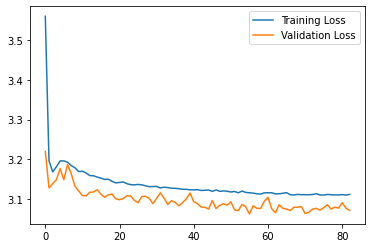

In [9]:
plot_loss(training_loss, validation_loss)

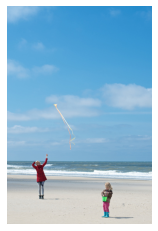

a man is flying a kite on a beach .


In [10]:
idx, images, captions = next(iter(test_loader))
img = Image.open(image_path+'/'+test_dataset.img_deque[idx[0]][0]).convert('RGB')
plt.imshow(img)
predict(encoder, decoder, img, test_dataset.vocab.idx2word, test_dataset.vocab.word2idx,device)